<a href="https://colab.research.google.com/github/kmayutrisna/IMDB_CNN_biLSTM/blob/main/IMDB_ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#Get the dataset from gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data =pd.read_csv("drive/My Drive/data/IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment Distribution')

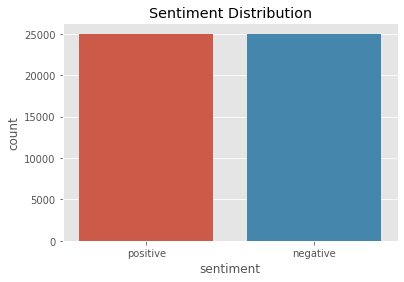

In [8]:
sns.countplot(x='sentiment',data=data)
plt.title("Sentiment Distribution")

In [9]:
for i in range(5):
    print("Review: ",[i])
    print(data['review'].iloc[i],"\n")
    print("Sentiment: ",data['sentiment'].iloc[i],"\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [10]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [11]:
# this is the function for calculating the words in each sentiment
#Now let's apply to the dataframe
data['word count'] = data['review'].apply(no_of_words)
data.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


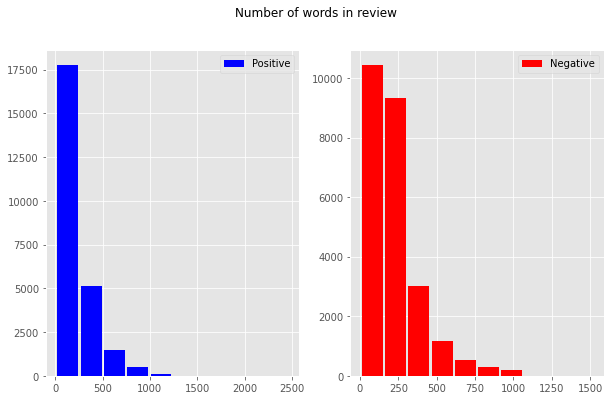

In [12]:
#Now use this word count to see the distribution of negative and positive reviews

fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(data[data['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(data[data['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [13]:
data.sentiment.replace("positive", 1, inplace=True)
data.sentiment.replace("negative", 2, inplace=True)
data.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [14]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)
#this is the function for text processing and now pass the data in this function 

In [16]:
nltk.download('punkt')
data.review = data['review'].apply(data_processing)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
data.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,2,138
4,petter matteis love time money visually stunni...,1,230


In [18]:
duplicated_count = data.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


In [19]:
data = data.drop_duplicates('review')

In [20]:
data.shape

(49578, 3)

In [21]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [22]:
data.review = data['review'].apply(lambda x: stemming(x))

In [23]:
data.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,2,138
4,petter matteis love time money visually stunni...,1,230


In [25]:
data['word count'] = data['review'].apply(no_of_words)
data.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,2,67
4,petter matteis love time money visually stunni...,1,125


In [26]:
pos_reviews =  data[data.sentiment == 1]
pos_reviews.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


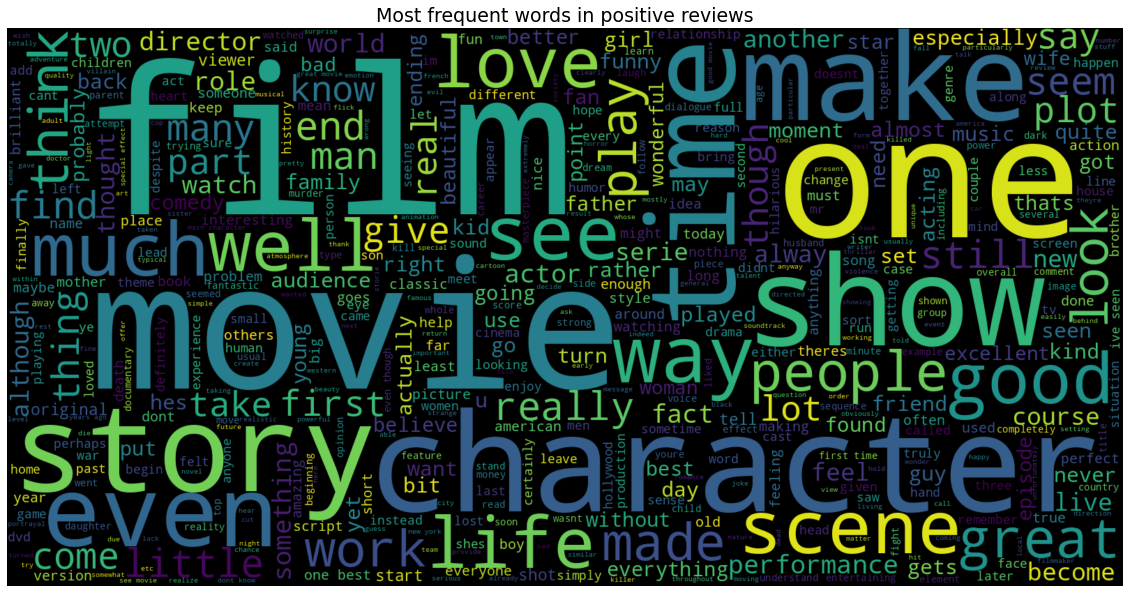

In [27]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [28]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [29]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281


In [30]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')

In [31]:
neg_reviews =  data[data.sentiment == 2]
neg_reviews.head()

,review,sentiment,word count
3,basically theres family little boy jake thinks...,2,67
7,show amazing fresh innovative idea 70s first a...,2,83
8,encouraged positive comments film looking forw...,2,64
10,phil alien one quirky films humour based aroun...,2,51
11,saw movie 12 came recall scariest scene big bi...,2,84


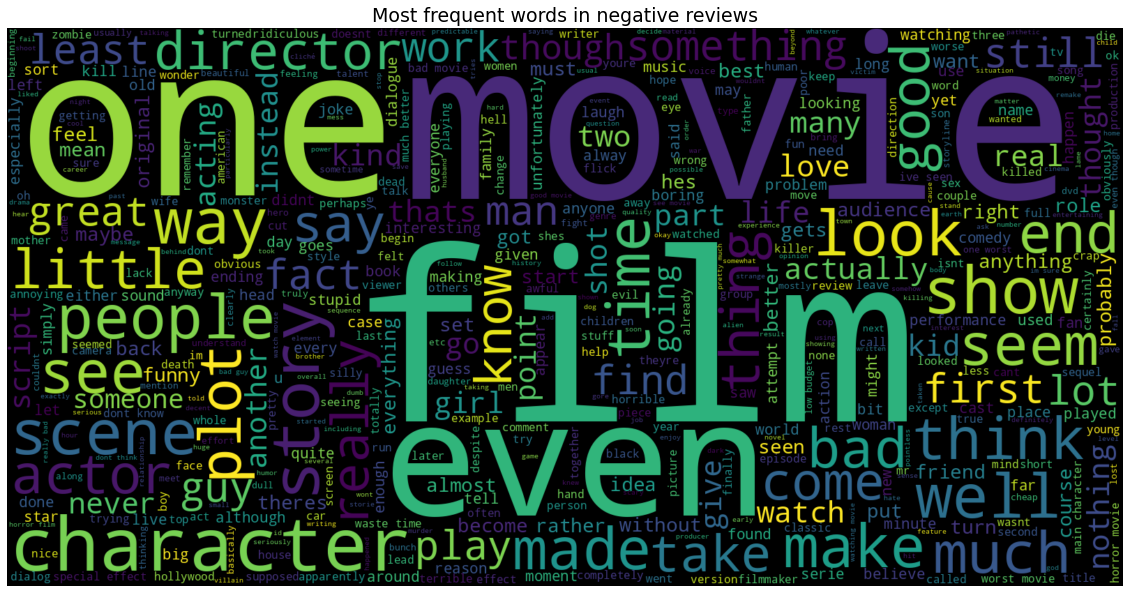

In [32]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [33]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [34]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movie,47001
1,film,34651
2,one,24361
3,like,21508
4,even,14759


In [35]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = data['review']
Y = data['sentiment']

In [38]:
from sklearn.feature_extraction.text import *

In [39]:
vect = TfidfVectorizer()
X = vect.fit_transform(data['review'])

In [52]:
X_train, X_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.8, shuffle = True, random_state = 42)
#X_train, X_rem, y_train, y_test = train_test_split(X, Y, train_size=0.7, shuffle = True, random_state = 42)

In [53]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, shuffle = True, random_state = 42)

In [55]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(39662, 221707)
(39662,)
(4958, 221707)
(4958,)
(4958, 221707)
(4958,)


(None, None)

In [57]:
print(X_test, y_test)

  (0, 46553)	0.11321120069319988
  (0, 44078)	0.11321120069319988
  (0, 131221)	0.11321120069319988
  (0, 181237)	0.11321120069319988
  (0, 91552)	0.11321120069319988
  (0, 25569)	0.11321120069319988
  (0, 117601)	0.11321120069319988
  (0, 10662)	0.11321120069319988
  (0, 44119)	0.11321120069319988
  (0, 114719)	0.11321120069319988
  (0, 23379)	0.11321120069319988
  (0, 210501)	0.11321120069319988
  (0, 165469)	0.11321120069319988
  (0, 119947)	0.11321120069319988
  (0, 177040)	0.10615320589152893
  (0, 128170)	0.10202454360226658
  (0, 88988)	0.09909521108985798
  (0, 107601)	0.09909521108985798
  (0, 174297)	0.19819042217971597
  (0, 29504)	0.0892682419576096
  (0, 210499)	0.25590751106910864
  (0, 28592)	0.09141990400930278
  (0, 125577)	0.1090825384039375
  (0, 62154)	0.09585254511379267
  (0, 190695)	0.09789588131300421
  :	:
  (4957, 118923)	0.05712174079588498
  (4957, 72961)	0.04348682554736869
  (4957, 32173)	0.051009164569912266
  (4957, 18374)	0.20656684504210254
  (4957, 78

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [63]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: ",logreg_acc)

Test accuracy:  0.890278338039532


In [64]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[2264  243]
 [ 301 2150]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      2507
           2       0.90      0.88      0.89      2451

    accuracy                           0.89      4958
   macro avg       0.89      0.89      0.89      4958
weighted avg       0.89      0.89      0.89      4958



In [66]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.24%


In [67]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[2131  376]
 [ 306 2145]]


              precision    recall  f1-score   support

           1       0.87      0.85      0.86      2507
           2       0.85      0.88      0.86      2451

    accuracy                           0.86      4958
   macro avg       0.86      0.86      0.86      4958
weighted avg       0.86      0.86      0.86      4958



In [68]:
svc = LinearSVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.15%


In [69]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[2255  252]
 [ 286 2165]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.89      2507
           2       0.90      0.88      0.89      2451

    accuracy                           0.89      4958
   macro avg       0.89      0.89      0.89      4958
weighted avg       0.89      0.89      0.89      4958



In [71]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose = 5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.9s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.877 total time=   0.7s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.4s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.885 total time=   0.5s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.879 total time=   0.5s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.889 total time=   0.8s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.8s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.7s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.897 total time=   0.8s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   1.3s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.892 total time=   2.8s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=5)

In [72]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.89
best parameters:  {'C': 1, 'loss': 'hinge'}


In [73]:
svc = LinearSVC(C = 1, loss='hinge')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.27%


In [74]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[2257  250]
 [ 282 2169]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.89      2507
           2       0.90      0.88      0.89      2451

    accuracy                           0.89      4958
   macro avg       0.89      0.89      0.89      4958
weighted avg       0.89      0.89      0.89      4958



In [76]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(rf_pred, y_test)
print("Test accuracy: {:.2f}%".format(rf_acc*100))



Test accuracy: 85.42%


In [78]:
print(confusion_matrix(y_test, rf_pred))
print("\n")
print(classification_report(y_test, rf_pred))

[[2185  322]
 [ 401 2050]]


              precision    recall  f1-score   support

           1       0.84      0.87      0.86      2507
           2       0.86      0.84      0.85      2451

    accuracy                           0.85      4958
   macro avg       0.85      0.85      0.85      4958
weighted avg       0.85      0.85      0.85      4958



In [79]:
vocab_size = 10000 #size of the vocabulary
max_length = 50 #maximum length of a sequence
trunc_type = 'post'
#when we are encoding our numeric sequence representations of the text data, our sentences (or arbitrary text chunk) lengths will not be uniform, and so we will need to select a maximum length for sentences and pad unused sentence positions in shorter sentences with a padding character. Whether we pre-pad or post-pad sentences is our decision to make, and we have selected 'post', meaning that our sentence sequence numeric representations corresponding to word index entries will appear at the left-most positions of our resulting sentence vectors, while the padding characters ('0') will appear after our actual data at the right-most positions of our resulting sentence vectors.
oov_tok = 'OOV' #tokens not appear in training vocab set with OOV, built during tokenization of our training data.

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
token = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
token.fit_on_texts(X_train)
index_word = token.index_word

#index_word

# Convert texts to sequences
train_seq = token.texts_to_sequences(X_train)
val_seq = token.texts_to_sequences(X_valid)
test_seq = token.texts_to_sequences(X_test)

#train_seq[3:7]
# Sequence padding
#Since the sequences have different lengtht, then we use padding method to put all sequences to the same length. 
#The parameter "maxlen" sets the maximum length of the output sequence. 
#    + If length of the input sequence is larger than "maxlen", then it is trunced to keep only #maxlen words, (truncating = 'pre': keep the previous part of the sequence; truncating = 'post': keep the posterior part of the sequence).
#    + If length of the input sequence is smaller than "maxlen", then 0 elements will be padded into the previous part of sequence (if padding = 'pre' - by defaut) or in the tail of the sequence (if padding = 'post').

train_pad = pad_sequences(train_seq, maxlen = max_length, padding = 'post', truncating = trunc_type)
val_pad = pad_sequences(val_seq, maxlen = max_length, padding = 'post', truncating = trunc_type)
test_pad = pad_sequences(test_seq, maxlen = max_length, padding = 'post', truncating = trunc_type)

AttributeError: ignored